In [130]:
import pandas as pd

In [131]:
df=pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [132]:
df.shape

(14999, 10)

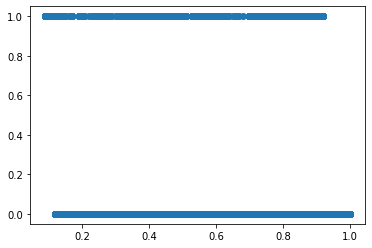

In [133]:
%matplotlib inline
from matplotlib import pyplot
pyplot.scatter(df.satisfaction_level,df.left)#

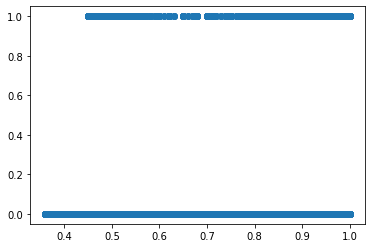

In [134]:
pyplot.scatter(df.last_evaluation,df.left)#

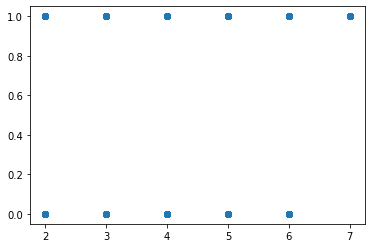

In [135]:
pyplot.scatter(df.number_project,df.left)

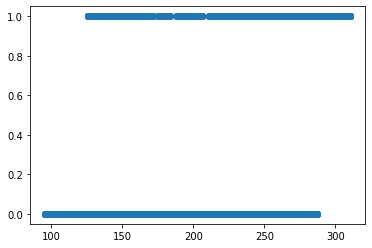

In [136]:
pyplot.scatter(df.average_montly_hours,df.left)#

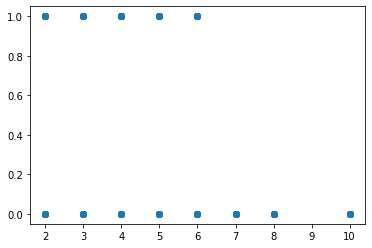

In [137]:
pyplot.scatter(df.time_spend_company,df.left) #

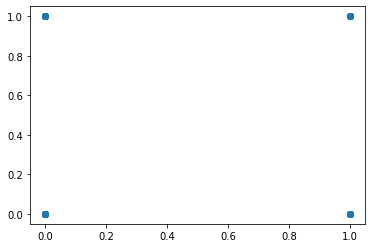

In [138]:
pyplot.scatter(df.Work_accident,df.left)

In [139]:
left=df[df.left==1]
left.shape

(3571, 10)

In [140]:
retain=df[df.left==0]
retain.shape

(11428, 10)

In [141]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


satisfaction_level,average_montly_hours,promotion_last_5years

<BarContainer object of 11428 artists>

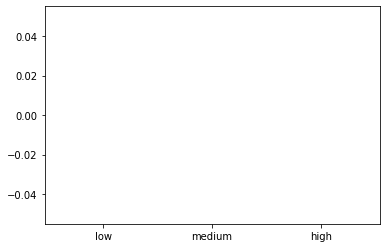

In [142]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(retain.salary,retain.left)


<AxesSubplot:xlabel='salary'>

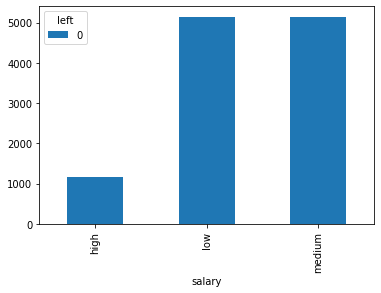

In [143]:
pd.crosstab(retain.salary,retain.left).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

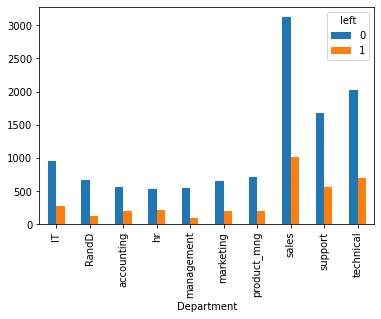

In [144]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
x_df=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
x_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [147]:
x_df.shape

(14999, 4)

In [148]:
dummies=pd.get_dummies(x_df.salary)

In [149]:
x_df=pd.concat([x_df,dummies],axis='columns')
x_df.shape

(14999, 7)

In [150]:
x_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [151]:
x_df.drop(['salary','medium'],axis='columns',inplace=True)
x_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1


In [152]:
x_df.shape

(14999, 5)

In [153]:
from sklearn.linear_model import LogisticRegression

In [154]:
model=LogisticRegression()

In [155]:
x_train,x_test,y_train,y_test=train_test_split(x_df[['satisfaction_level','average_montly_hours','promotion_last_5years','high','low']],df.left,train_size=0.3)

In [156]:
x_train.shape

(4499, 5)

In [157]:
y_train.shape

(4499,)

In [158]:
model.fit(x_train,y_train)

LogisticRegression()

In [159]:
model.predict(x_test)

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [160]:
model.score(x_train,y_train)


0.7695043342965103

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
x2_df=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
x2_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [163]:
x2_df.shape

(14999, 4)

In [164]:
dummies=pd.get_dummies(x2_df.salary)
dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [165]:
x2_df=pd.concat([x2_df,dummies],axis='columns')
x2_df.shape

(14999, 7)

In [166]:
x2_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [167]:
x2_df.shape

(14999, 7)

In [168]:
from sklearn.linear_model import LogisticRegression

In [169]:
model2=LogisticRegression()

In [175]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2_df[['satisfaction_level','average_montly_hours','promotion_last_5years','high','low','medium']],df.left,train_size=0.3)

In [176]:
x2_train.shape

(4499, 6)

In [177]:
y2_train.shape

(4499,)

In [178]:
model2.fit(x2_train,y2_train)

LogisticRegression()

In [185]:
model2.score(x2_train,y2_train)

0.7783951989330963

In [188]:
model2.predict_proba(x2_train)

array([[0.82320192, 0.17679808],
       [0.62261687, 0.37738313],
       [0.89560103, 0.10439897],
       ...,
       [0.71528713, 0.28471287],
       [0.8393622 , 0.1606378 ],
       [0.26957161, 0.73042839]])